# **TITANIC SURVIVAL ANALYSIS**

#### **Import Libraries**

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **Load the Dataset**

In [4]:


df = pd.read_csv("Titanic.csv.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Basic Information**

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Handling Missing Values**

In [9]:
# Fill Missing Age with median value
df['Age'].fillna(df['Age'].median(), inplace = True)

#Fill Missing Embarked with mode(most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

# Drop the Cabin column (too many missing values)
df.drop(columns = ['Cabin'] , inplace = True)

df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17404\1962677394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17404\1962677394.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### **Fixing Column Names**

In [10]:
df.rename(columns ={
    'PassengerId' : 'Passengers_Id',
    'Pclass' : 'Passenger_Class',
    'SibSp' : 'Sibilings_Spouses',
    'Parch' : 'Parents_Children'
} , inplace = True)

df.columns

Index(['Passengers_Id', 'Survived', 'Passenger_Class', 'Name', 'Sex', 'Age',
       'Sibilings_Spouses', 'Parents_Children', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## **Univariate Analysis**

#### **Survival Count**

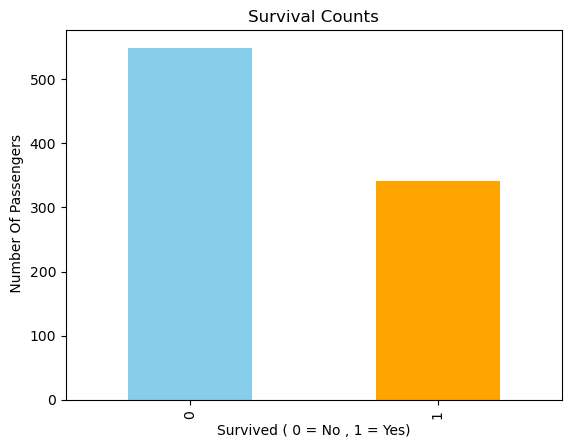

In [11]:
df['Survived'].value_counts().plot(kind = 'bar' , color = ['Skyblue', 'Orange'])

plt.title("Survival Counts")

plt.xlabel("Survived ( 0 = No , 1 = Yes)")

plt.ylabel(" Number Of Passengers")

plt.show()

#### **Passenger Class Distribution**

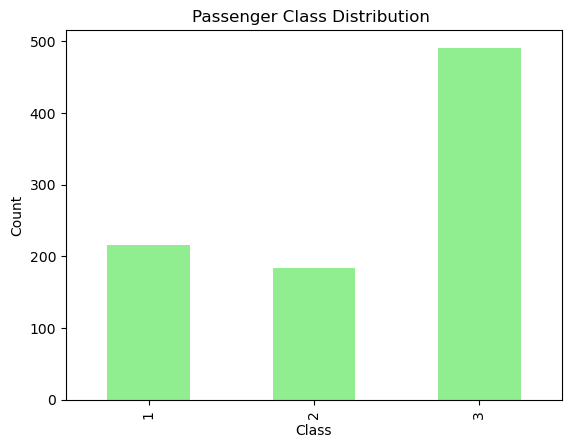

In [13]:
df['Passenger_Class'].value_counts().sort_index().plot(kind = "bar" , color = 'Lightgreen')

plt.title("Passenger Class Distribution ")

plt.xlabel("Class")

plt.ylabel("Count")

plt.show()

#### **Gender Count**

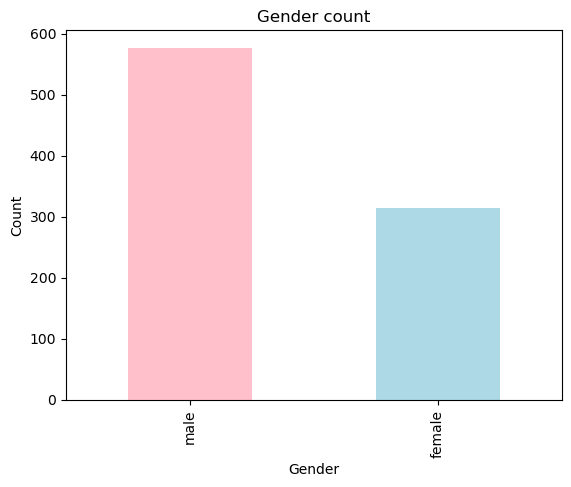

In [14]:
df['Sex'].value_counts().plot(kind = "bar", color = ['Pink', 'Lightblue'])

plt.title("Gender count")

plt.xlabel("Gender")

plt.ylabel("Count")

plt.show()

#### **Age Distribution**

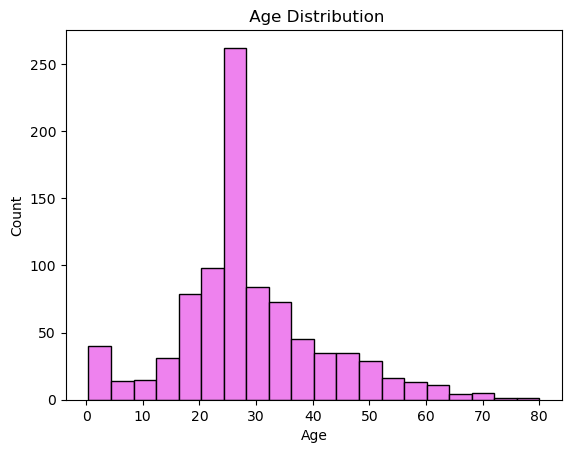

In [15]:
plt.hist(df['Age'], bins = 20 , color = 'violet' , edgecolor = 'Black')

plt.title(" Age Distribution")

plt.xlabel("Age")

plt.ylabel("Count")

plt.show()

## **Bivariate Analysis**

#### **Survival by Gender**

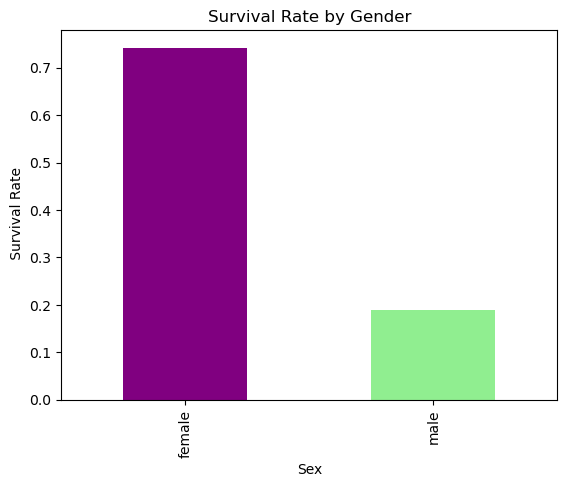

In [17]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()

survival_by_gender.plot(kind = 'bar' , color = ['purple', 'Lightgreen'])

plt.title("Survival Rate by Gender")

plt.ylabel(" Survival Rate")

plt.show()

#### **Survival by Passenger Class**

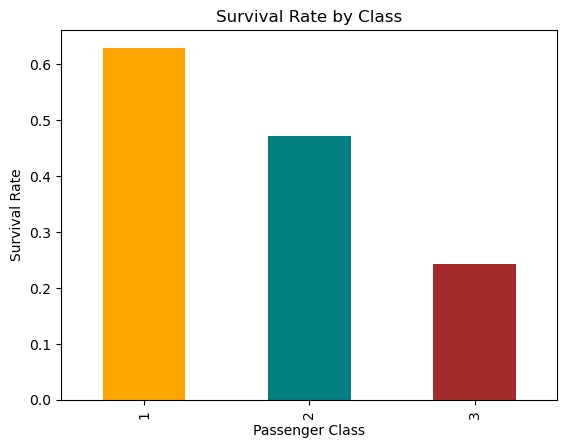

In [18]:
survival_by_class = df.groupby('Passenger_Class')['Survived'].mean()

survival_by_class.plot(kind = 'bar' , color = ['Orange', 'Teal', 'Brown'] )

plt.title("Survival Rate by Class")

plt.xlabel("Passenger Class")

plt.ylabel("Survival Rate")

plt.show()

#### **Age VS Fare**

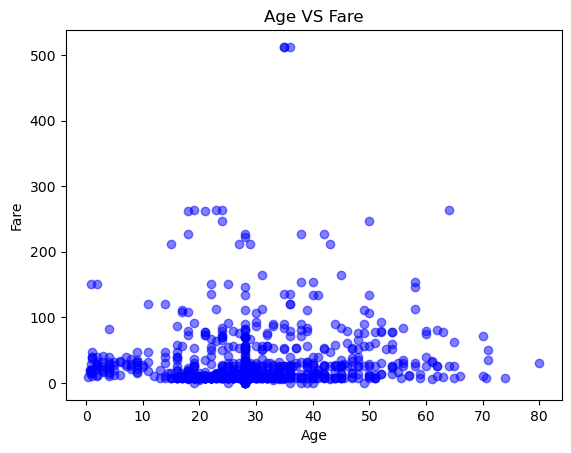

In [19]:
plt.scatter(df['Age'], df['Fare'] , color = 'Blue' , alpha = 0.5)

plt.title("Age VS Fare")

plt.xlabel("Age")

plt.ylabel("Fare")

plt.show()

#### **Correlation Matrix**

In [20]:
corr = df.corr(numeric_only = True)

corr

,Passengers_Id,Survived,Passenger_Class,Age,Sibilings_Spouses,Parents_Children,Fare
Passengers_Id,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Passenger_Class,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
Sibilings_Spouses,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parents_Children,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


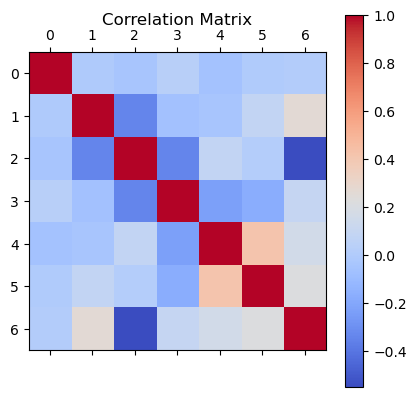

In [21]:
plt.matshow(corr, cmap='coolwarm')

plt.title("Correlation Matrix" , pad = 20)

plt.colorbar()

plt.show()

#### **Detect Outliers**

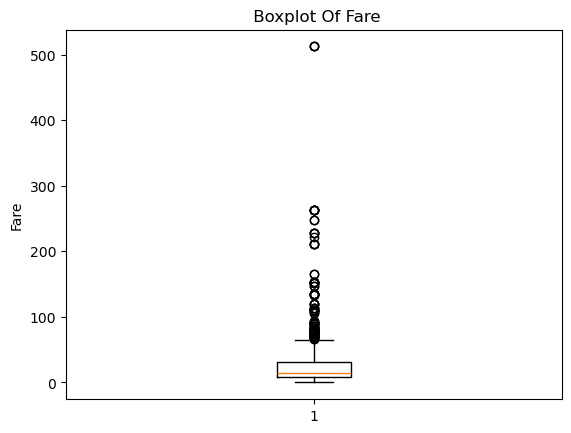

In [22]:
plt.boxplot(df['Fare'])

plt.title(" Boxplot Of Fare")

plt.ylabel("Fare")

plt.show()

## **Summary Of Findings**

In [25]:
print("🔹 Most passengers were in 3rd class.")
print("🔹 More males traveled, but females survived more.")
print("🔹 Younger passengers had moderate fares.")
print("🔹 First-class passengers had higher chances of survival.")
print("🔹 Some outliers existed in Fare values.")

🔹 Most passengers were in 3rd class.
🔹 More males traveled, but females survived more.
🔹 Younger passengers had moderate fares.
🔹 First-class passengers had higher chances of survival.
🔹 Some outliers existed in Fare values.
